In [5]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

from scipy.io import loadmat

In [6]:
data = loadmat("Satellite.mat")

In [7]:
print(data)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Tue Apr 26 19:11:01 2016', '__version__': '1.0', '__globals__': [], 'X': array([[ 92, 115, 120, ..., 107, 113,  87],
       [ 84, 102, 106, ...,  99, 104,  79],
       [ 84, 102, 102, ...,  99, 104,  79],
       ...,
       [ 56,  68,  91, ...,  83,  92,  74],
       [ 56,  68,  87, ...,  83,  92,  70],
       [ 60,  71,  91, ...,  79, 108,  92]], dtype=uint8), 'y': array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]], dtype=uint8)}


In [8]:
data = {k: v for k, v in data.items() if k[0] != '_'}

In [9]:
print(data)

{'X': array([[ 92, 115, 120, ..., 107, 113,  87],
       [ 84, 102, 106, ...,  99, 104,  79],
       [ 84, 102, 102, ...,  99, 104,  79],
       ...,
       [ 56,  68,  91, ...,  83,  92,  74],
       [ 56,  68,  87, ...,  83,  92,  70],
       [ 60,  71,  91, ...,  79, 108,  92]], dtype=uint8), 'y': array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]], dtype=uint8)}


In [10]:
df = pd.DataFrame(np.concatenate((np.array(data['X']), np.array(data['y'])), axis=1))
X = np.array(data['X'])
y = np.array(data['y']).reshape(-1)
# print(X)
# print(y)
print(df)

      0    1    2   3   4    5    6   7   8    9   ...   27  28   29   30  \
0     92  115  120  94  84  102  106  79  84  102  ...  104  88  121  128   
1     84  102  106  79  84  102  102  83  80  102  ...  100  84  107  113   
2     84  102  102  83  80  102  102  79  84   94  ...   87  84   99  104   
3     80  102  102  79  84   94  102  79  80   94  ...   79  84   99  104   
4     84   94  102  79  80   94   98  76  80  102  ...   79  84  103  104   
...   ..  ...  ...  ..  ..  ...  ...  ..  ..  ...  ...  ...  ..  ...  ...   
6430  60   83   96  85  64   87  100  88  64   83  ...   92  66   87  108   
6431  64   79  100  85  56   71   96  85  56   68  ...   85  66   83  100   
6432  56   68   91  81  56   64   91  81  53   64  ...   81  59   87   96   
6433  56   68   87  74  60   71   91  81  60   64  ...   74  59   83   92   
6434  60   71   91  81  60   64  104  99  56   64  ...   74  59   83   92   

       31  32   33   34  35  36  
0     100  84  107  113  87   0  
1      

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf.fit(X_train, y_train)

predict = clf.predict(X_test)
print('Accuracy: {}'.format(accuracy_score(y_test, predict)))
print(predict[:30])
print(y_test[:30])

Accuracy: 0.846930846930847
[0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
[0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0]


In [12]:
print(len(list(df)))

37


In [13]:
cv = KFold(n_splits=10)
accuracies = list()
max_attributes = len(list(df)) - 1
depth_range = range(1, max_attributes + 1)
score = [0, 0]

for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(max_depth=depth, criterion='entropy', random_state=0)
    for train_fold, valid_fold in cv.split(X):
        f_train = df.loc[train_fold]
        f_valid = df.loc[valid_fold]
        
        model = tree_model.fit(X=f_train.drop([36],axis=1), y=f_train[36])
        valid_acc = model.score(X = f_valid.drop([36],axis=1), y = f_valid[36])
        fold_accuracy.append(valid_acc)
        
        
    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    if score[-1] < avg:
            score = [depth, avg]
    
result = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
result = result[["Max Depth", "Average Accuracy"]]
print(result.to_string(index=False))
print(score)

 Max Depth  Average Accuracy
         1          0.845701
         2          0.845701
         3          0.839178
         4          0.842751
         5          0.846010
         6          0.859224
         7          0.835907
         8          0.857192
         9          0.859219
        10          0.857661
        11          0.865584
        12          0.859834
        13          0.860614
        14          0.854708
        15          0.860772
        16          0.858749
        17          0.862947
        18          0.864032
        19          0.863723
        20          0.867297
        21          0.864807
        22          0.860613
        23          0.864965
        24          0.864964
        25          0.864342
        26          0.862788
        27          0.864031
        28          0.864031
        29          0.864187
        30          0.863876
        31          0.863876
        32          0.863876
        33          0.863876
        34    

[Text(167.4, 190.26, 'X[17] <= 65.0\ngini = 0.429\nsamples = 5148\nvalue = [3546, 1602]'),
 Text(83.7, 135.9, 'X[17] <= 61.5\ngini = 0.085\nsamples = 918\nvalue = [41, 877]'),
 Text(41.85, 81.53999999999999, 'X[21] <= 60.5\ngini = 0.017\nsamples = 829\nvalue = [7, 822]'),
 Text(20.925, 27.180000000000007, 'gini = 0.0\nsamples = 748\nvalue = [0, 748]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.158\nsamples = 81\nvalue = [7, 74]'),
 Text(125.55000000000001, 81.53999999999999, 'X[15] <= 64.5\ngini = 0.472\nsamples = 89\nvalue = [34, 55]'),
 Text(104.625, 27.180000000000007, 'gini = 0.252\nsamples = 27\nvalue = [23, 4]'),
 Text(146.475, 27.180000000000007, 'gini = 0.292\nsamples = 62\nvalue = [11, 51]'),
 Text(251.10000000000002, 135.9, 'X[17] <= 96.5\ngini = 0.284\nsamples = 4230\nvalue = [3505, 725]'),
 Text(209.25, 81.53999999999999, 'X[12] <= 71.5\ngini = 0.383\nsamples = 2446\nvalue = [1815, 631]'),
 Text(188.32500000000002, 27.180000000000007, 'gini = 0.269\nsamples = 

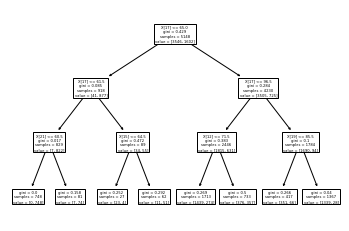

In [14]:
from sklearn import tree

decision_tree = tree.DecisionTreeClassifier(random_state=0, max_depth=20) # 'gini' with max_depth 3
decision_tree.fit(X_train, y_train)

tree.plot_tree(clf)
# # Export our trained model as a .dot file
# with open("tree1.dot", 'w') as f:
#      f = tree.export_graphviz(decision_tree,
#                               out_file=f,
#                               max_depth = 20,
#                               impurity = True,
#                               feature_names = list(df.drop([36], axis=1)),
#                               class_names = ['outlier', 'inlier'],
#                               rounded = True,
#                               filled= True )
# from graphviz import Source
# path = 'C:/Users/tony9/OneDrive/문서/KNU/DKE_assignment/Time series/time-series-analysis/bitcoin_jihun/Compare/tree1.dot'
# s = Source.from_file(path)
# s.view()
# # #Convert .dot to .png to allow display in web notebook
# # check_call(['dot','-Tpng','tree1.dot','-o','tree1.png'])

# # # Annotating chart with PIL
# # img = Image.open("tree1.png")
# # draw = ImageDraw.Draw(img)
# # img.save('sample-out.png')
# # PImage("sample-out.png")